<!--NAVIGATION-->
<!--NAVIGATION-->
<!-- markdownlint-disable -->
<h2 align="center" style="font-family:verdana;font-size:150%"> <b>S</b>equencing <b>A</b>nalysis and <b>D</b>ata Library for <b>I</b>mmunoinformatics <b>E</b>xploration <br><br>Demonstration for AIRR-C 2022</h2>
<div align="center">
  <img src="https://sadiestaticcrm.s3.us-west-2.amazonaws.com/Sadie.svg" alt="SADIE" style="margin:0.2em;width:50%">
</div>
<br>

<a href="https://colab.research.google.com/github/jwillis0720/sadie/blob/airr_c/notebooks/airr_c/SADIE_DEMO.ipynb"><img align="center" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Setup

Here we will setup our files for the demo. If you are running the notebook locally, these files don't need to be pulled from the repository

In [24]:
def install_packages() -> None:
    !pip -q install git+https://github.com/jwillis0720/sadie.git@6fe0ebf5c906cb0f94a817b74113929d09d88eeb
    !pip -q install seaborn matplotlib


def get_demo_files() -> None:
    """Get the demonstration files for AIRR-C 2022"""
    !wget -q -O input.tgz https://github.com/jwillis0720/sadie/raw/airr_c/notebooks/airr_c/input.tgz
    !tar -xf input.tgz


import sys

if "google.colab" in sys.modules:
    install_packages()
    get_demo_files()
else:
    %load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# 1. Low Level

First, let's start at a very low level. These are pythonic objects that model the data we expect in an AIRR compliant data format. They are divided by [AIRR 1.3 Rearragment category](https://docs.airr-community.org/en/stable/datarep/rearrangements.html)

* Input Sequence
* Primay Annotations
* Alignment Annotations
* Alignment Positions
* RegionSequences
* RegionPositions


All of these are combined as a `Receptor Chain` Object. 

Now let's take a look how a person interested in low level programming could use these objects

## First Model - Input Sequence

In [25]:
from sadie.receptor.rearrangment import InputSequence
from Bio import SeqIO
from pprint import pprint

vrc01_heavy_sequecne = SeqIO.read("input/vrc01_heavy.fasta", "fasta")

# make an input sequence model
input_sequence_model = InputSequence(
    sequence_id=vrc01_heavy_sequecne.name,
    sequence=vrc01_heavy_sequecne.seq,
    raw_sequence=vrc01_heavy_sequecne.seq,
)

# Print out dictionary to see
pprint(input_sequence_model.__dict__)

{'category': RearrargmentCategory(category='input'),
 'raw_sequence': Seq('CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATG...GGG'),
 'sequence': Seq('CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATG...GGG'),
 'sequence_aa': None,
 'sequence_id': 'VRC01_heavy'}


## Second Model - Primary Annotations

In [26]:
from sadie.receptor.rearrangment import PrimaryAnnotations

# make a primary sequence model
primary_sequence_annotation_model = PrimaryAnnotations(
    rev_comp=False,
    productive=True,
    vj_in_frame=True,
    stop_codon=False,
    complete_vdj=True,
    locus="IGH",
    v_call="IGHV1-2*02",
    d_call=["IGHD3-16*01", "IGHD3-16*02"],
    j_call="IGHJ1*01",
    v_call_top="IGHV1-2*02",
    d_call_top="IGHD3-16*01",
    j_call_top="IGHJ1*01",
    c_call="IGHG1*01",
)
pprint(primary_sequence_annotation_model.__dict__)

{'c_call': 'IGHG1*01',
 'c_call_allele': None,
 'category': RearrargmentCategory(category='primary_annotations'),
 'complete_vdj': True,
 'd2_call': None,
 'd_call': ['IGHD3-16*01', 'IGHD3-16*02'],
 'd_call_allele': None,
 'd_call_gene': None,
 'd_call_top': 'IGHD3-16*01',
 'j_call': 'IGHJ1*01',
 'j_call_top': 'IGHJ1*01',
 'j_call_top_allele': None,
 'j_call_top_gene': None,
 'locus': 'IGH',
 'productive': True,
 'rev_comp': False,
 'species': None,
 'stop_codon': False,
 'v_call': 'IGHV1-2*02',
 'v_call_top': 'IGHV1-2*02',
 'v_call_top_allele': None,
 'v_call_top_gene': None,
 'vj_in_frame': True}


## Alignment Annotations

In [27]:
from sadie.receptor.rearrangment import AlignmentAnnotations

# Model 3 - Alignment Annotations
alignment_annotations_model = AlignmentAnnotations(
    sequence_alignment="CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAG",
    sequence_alignment_aa="QVQLVQSGGQMKKPGESMRISCRASGYEFIDCTLNWIRLAPGKRPEWMGWLKPRGGAVNYARPLQGRVTMTRDVYSDTAFLELRSLTVDDTAVYFCTRGKNCDYNWDFEHWGRGTPVIVSS",
    germline_alignment="CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCACCGGCTACTATATGCACTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAACCCTAACAGTGGTGGCACAAACTATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGNNNNNNNNNNNNTGATTACGTTTGGGACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG",
    germline_alignment_aa="QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSISTAYMELSRLRSDDTAVYYCAXXXXXDYVWDFQHWGQGTLVTVSS",
    v_score=168.2,
    d_score=17.8,
    j_score=52.6,
    v_identity=0.6825,
    d_identity=0.85,
    j_identity=0.86,
    v_cigar="6S293M76S3N",
    d_cigar="311S6N14M50S17N",
    j_cigar="325S7N45M5S",
    v_support=6.796e-44,
    d_support=0.5755,
    j_support=5.727e-11,
    junction="TGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGG",
    junction_aa="CTRGKNCDYNWDFEHW",
    np1="GGGAAAAAACTG",
    c_score=100,
    c_identity=1,
    c_support=1e-44,
    c_cigar="6S293M76S3N",
)
# alignment_sequence_annotation_model = AlignmentAnnotations(**alignment_dict)
pprint(alignment_annotations_model.__dict__)

{'c_cigar': '6S293M76S3N',
 'c_identity': 1.0,
 'c_score': 100.0,
 'c_support': 1e-44,
 'category': RearrargmentCategory(category='alignment_annotations'),
 'd2_cigar': None,
 'd2_identity': None,
 'd2_score': None,
 'd2_support': None,
 'd_cigar': '311S6N14M50S17N',
 'd_identity': 0.85,
 'd_score': 17.8,
 'd_support': 0.5755,
 'germline_alignment': 'CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCACCGGCTACTATATGCACTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAACCCTAACAGTGGTGGCACAAACTATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGNNNNNNNNNNNNTGATTACGTTTGGGACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG',
 'germline_alignment_aa': 'QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSISTAYMELSRLRSDDTAVYYCAXXXXXDYVWDFQHWGQGTLVTVSS',
 'j_cigar': '325S7N45M5S',
 'j_identity': 0.86,
 'j_score': 52.6,
 'j_support': 5.727e-11,
 'junction': 'TGTACTAGGGGAAAAAACTGTGAT

# Optional but recommended models

## AlignmentPositions

In [28]:
from sadie.receptor.rearrangment import AlignmentPositions

alignment_positions_dict = dict(
    v_sequence_start=7,
    v_sequence_end=299,
    v_germline_start=1,
    v_germline_end=293,
    v_alignment_start=1,
    v_alignment_end=293,
    d_sequence_start=312,
    d_sequence_end=325,
    d_germline_start=7,
    d_germline_end=20,
    d_alignment_start=306,
    d_alignment_end=319,
    j_sequence_start=326,
    j_sequence_end=370,
    j_germline_start=8,
    j_germline_end=52,
    j_alignment_start=320,
    j_alignment_end=364,
)
alignment_positions_model = AlignmentPositions(**alignment_positions_dict)
pprint(alignment_positions_model.__dict__)

{'category': RearrargmentCategory(category='alignment_positions'),
 'd2_alignment_end': None,
 'd2_alignment_start': None,
 'd2_germline_end': None,
 'd2_germline_start': None,
 'd2_sequence_end': None,
 'd2_sequence_start': None,
 'd_alignment_end': 319,
 'd_alignment_start': 306,
 'd_germline_end': 20,
 'd_germline_start': 7,
 'd_sequence_end': 325,
 'd_sequence_start': 312,
 'j_alignment_end': 364,
 'j_alignment_start': 320,
 'j_germline_end': 52,
 'j_germline_start': 8,
 'j_sequence_end': 370,
 'j_sequence_start': 326,
 'v_alignment_end': 293,
 'v_alignment_start': 1,
 'v_germline_end': 293,
 'v_germline_start': 1,
 'v_sequence_end': 299,
 'v_sequence_start': 7}


## RegionSequences

In [29]:
from sadie.receptor.rearrangment import RegionSequences

region_sequence_dict = dict(
    fwr="CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCT",
    fwr1_aa="QVQLVQSGGQMKKPGESMRISCRAS",
    cdr1="GGATATGAATTTATTGATTGTACG",
    cdr1_aa="GYEFIDCT",
    fwr2="CTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGG",
    fwr2_aa="LNWIRLAPGKRPEWMGW",
    cdr2="CTGAAGCCTCGGGGGGGGGCCGTC",
    cdr2_aa="LKPRGGAV",
    fwr3="AACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGT",
    fwr3_aa="NYARPLQGRVTMTRDVYSDTAFLELRSLTVDDTAVYFC",
    cdr3="ACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACAC",
    cdr3_aa="TRGKNCDYNWDFEH",
    fwr4="TGGGGCCGGGGCACCCCGGTCATCGTCTCATCA",
    fwr4_aa="WGRGTPVIVSS",
)
region_sequence_model = RegionSequences(**region_sequence_dict)
pprint(region_sequence_model.__dict__)

{'category': RearrargmentCategory(category='region_sequence_annotations'),
 'cdr1': 'GGATATGAATTTATTGATTGTACG',
 'cdr1_aa': 'GYEFIDCT',
 'cdr2': 'CTGAAGCCTCGGGGGGGGGCCGTC',
 'cdr2_aa': 'LKPRGGAV',
 'cdr3': 'ACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACAC',
 'cdr3_aa': 'TRGKNCDYNWDFEH',
 'fwr1': None,
 'fwr1_aa': 'QVQLVQSGGQMKKPGESMRISCRAS',
 'fwr2': 'CTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGG',
 'fwr2_aa': 'LNWIRLAPGKRPEWMGW',
 'fwr3': 'AACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGT',
 'fwr3_aa': 'NYARPLQGRVTMTRDVYSDTAFLELRSLTVDDTAVYFC',
 'fwr4': 'TGGGGCCGGGGCACCCCGGTCATCGTCTCATCA',
 'fwr4_aa': 'WGRGTPVIVSS'}


In [30]:
from sadie.receptor.rearrangment import RegionPositions

region_positions_dict = dict(
    fwr1_start=7,
    fwr1_end=81,
    cdr1_start=82,
    cdr1_end=105,
    fwr2_start=106,
    fwr2_end=156,
    cdr2_start=157,
    cdr2_end=180,
    fwr3_start=181,
    fwr3_end=294,
    cdr3_start=295,
    cdr3_end=336,
    fwr4_start=337,
    fwr4_end=369,
)
region_position_model = RegionPositions(**region_positions_dict)
pprint(region_position_model.__dict__)

{'category': RearrargmentCategory(category='region_positions'),
 'cdr1_end': 105,
 'cdr1_start': 82,
 'cdr2_end': 180,
 'cdr2_start': 157,
 'cdr3_end': 336,
 'cdr3_start': 295,
 'fwr1_end': 81,
 'fwr1_start': 7,
 'fwr2_end': 156,
 'fwr2_start': 106,
 'fwr3_end': 294,
 'fwr3_start': 181,
 'fwr4_end': 369,
 'fwr4_start': 337}


# Junction Lengths

In [31]:
from sadie.receptor.rearrangment import JunctionLengths

junction_length_dict = dict(
    junction_length=48,
    junction_aa_length=None,
    np1_length=None,
    np2_length=None,
    np3_length=None,
    n1_length=None,
    n2_length=None,
    n3_length=None,
    p3v_length=None,
    p5d_length=None,
    p3d_length=None,
    p5d2_length=None,
    p3d2_length=None,
    p5j_length=None,
)
junction_length_model = JunctionLengths(**junction_length_dict)
pprint(junction_length_model.__dict__)

{'category': RearrargmentCategory(category='junction_lengths'),
 'junction_aa_length': None,
 'junction_length': 48,
 'n1_length': None,
 'n2_length': None,
 'n3_length': None,
 'np1_length': None,
 'np2_length': None,
 'np3_length': None,
 'p3d2_length': None,
 'p3d_length': None,
 'p3v_length': None,
 'p5d2_length': None,
 'p5d_length': None,
 'p5j_length': None}


## ReceptorChain

All of those annotations can now be [composed](https://www.youtube.com/watch?v=0mcP8ZpUR38) into a ReceptorChain model

In [32]:
from sadie.receptor.rearrangment import ReceptorChain

receptor_chain = ReceptorChain(
    input_sequence=input_sequence_model,
    primary_annotations=primary_sequence_annotation_model,
    alignment_annotations=alignment_annotations_model,
    alignment_positions=alignment_positions_model,
    region_sequences=region_sequence_model,
    region_positions=region_sequence_model,
    junction_lengths=junction_length_model,
)
print(receptor_chain)

input_sequence
--------------
sequence_id : VRC01_heavy
sequence : CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAGGGGGG
raw_sequence : CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAGGGGGG
sequence_aa : None
category : category='input'


primary_annotations
-------------------
rev_comp : False
productive : True
vj_in_frame : True
stop_codon : False
complete_vdj : T

# 2. Mid-level

Okay, but maybe you don't even care about composing low level objects. You just have a sequence without the proper annotations. You can use convienience methods to quickly fill in the annotations in the model. How does it align and annotate? More on that later


In [33]:
receptor_chain = ReceptorChain.from_single("vrc01_heavy", vrc01_heavy_sequecne.seq)
# Same as before but from the `from_single` method
print(receptor_chain)

input_sequence
--------------
sequence_id : vrc01_heavy
sequence : CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAGGGGGG
raw_sequence : None
sequence_aa : None
category : category='input'


primary_annotations
-------------------
rev_comp : False
productive : True
vj_in_frame : True
stop_codon : False
complete_vdj : True
locus : IGH
v_call : IGHV1-2*02
d_call : IGHD3-16*01,IGHD3-16*02
d2_call : None
j_call : IGHJ1*01
c_call : None
v_call_top : IGHV1-2*02
v_call_top_gene : None
v_call_top_allele : None
d_call_top : IGHD3-16*01
d_call_gene : None
d_call_allele : None
j_call_top : IGHJ1*01
j_call_top_gene : None
j_call_top_allele : None
c_call_allele : None
species : human
categ

<h1><u> Using the SADIE AIRR module:</u></h1>

SADIE AIRR will annotate sequences, verify fields, and return an AirrTable. The AirrTable is a subclass of a pandas dataframe so anything you can do on pandas, you can do on an AirrTable.

There are a variety of databases that ship with SADIE:

<u>From IMGT</u>
 - CLK
 - Dog
 - Human
 - Mouse
 - Rabbit
 - Rat
 
<u> Custom </u>
 - Macaque

In [34]:
from sadie.airr import Airr
import seaborn as sns
from matplotlib import pyplot as plt
import logging


logger = logging.getLogger()
logger.setLevel("INFO")

airr_api_human = Airr("human", database="imgt", adaptable=True)

catnap_heavy = airr_api_human.run_fasta("input/catnap_nt_heavy_sub.fasta")
catnap_light = airr_api_human.run_fasta("input/catnap_nt_light_sub.fasta")

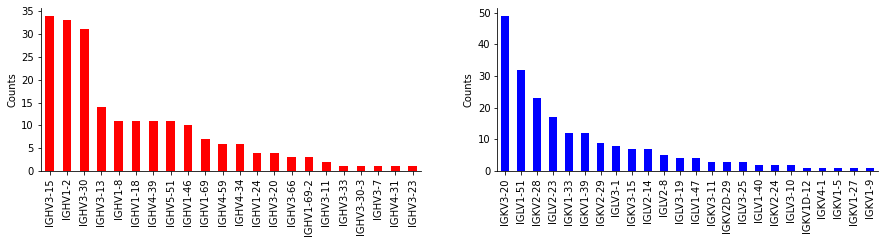

In [35]:
def plot_v_genes(df_one, df_two, colors=["red", "blue"]):
    """very simple function to plot v gene dataframes"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    for df, axis, color in zip([df_one, df_two], axes, colors):
        df["v_call_top"].str.split("*").str.get(0).value_counts().plot(
            kind="bar", color=color, ax=axis
        )
        axis.set_ylabel("Counts")
        sns.despine()


plot_v_genes(catnap_heavy, catnap_light)

## Alternate species

Okay, but what about a different species

In [36]:
airr_api_mouse = Airr("mouse", database="imgt", adaptable=False)
catnap_heavy_mouse = airr_api_mouse.run_fasta("input/catnap_nt_heavy_sub.fasta")
catnap_light_mouse = airr_api_mouse.run_fasta("input/catnap_nt_light_sub.fasta")

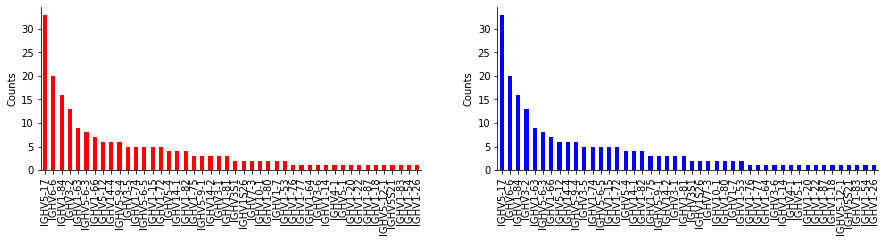

In [37]:
plot_v_genes(catnap_heavy_mouse, catnap_heavy_mouse)

## Custom Databases - How about Watson/Karlsson-Hedestam?

In this instance, instead of calling things from IMGT, let's use a custom database

In [38]:
airr_api_macaque = Airr("macaque", database="custom", adaptable=False)
catnap_heavy_macaque = airr_api_macaque.run_fasta("input/catnap_nt_heavy_sub.fasta")
catnap_light_macaque = airr_api_macaque.run_fasta("input/catnap_nt_light_sub.fasta")

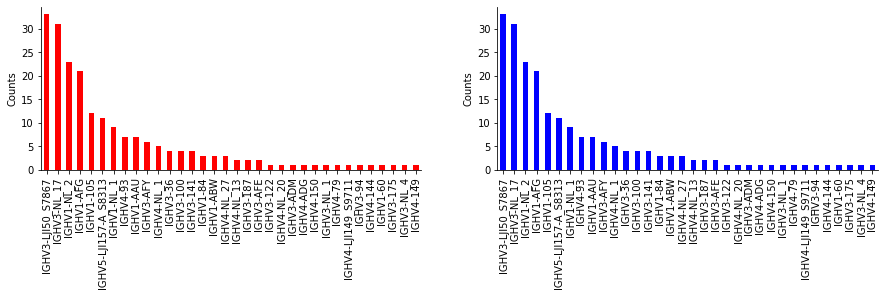

In [39]:
plot_v_genes(catnap_heavy_macaque, catnap_heavy_macaque)

<h1><u> Using the SADIE Reference module:</u></h1>

SADIE uses a reference database. It uses a real time web API caled the *G*ermline *G*ene *G*ateway which provides realtime, currated genes avaialble via a RESTful API that conforms to [OpenAPI standards](https://swagger.io/specification/)

[Let's take a look at the reference database](https://g3.jordanrwillis.com/docs)

Since it's RESTful, we can gather database information programatically in real time!

In [40]:
import requests

results = requests.get(
    "https://g3.jordanrwillis.com/api/v1/genes?source=imgt&common=human&segment=V&limit=3"
).json()
results

[{'_id': '608b90908e6710a05b587046',
  'source': 'imgt',
  'common': 'human',
  'gene': 'IGHV1-18*01',
  'label': 'V-REGION',
  'gene_segment': 'V',
  'receptor': 'IG',
  'sequence': 'CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTACAATGGTAACACAAACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGA',
  'latin': 'Homo_sapiens',
  'imgt': {'sequence': 'CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTACAATGGTAACACAAACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGAGA',
   'sequence_gapped': 'CAGGTTCAGCTGGTGCAGTCTGGAGCT...GAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTT............ACCAGCTATGGTATCAGCTGGGTGCGACAGGCCCCTGGACAA

In [41]:
import pandas as pd

results_df = pd.json_normalize(results)
results_df

,_id,source,common,gene,label,gene_segment,receptor,sequence,latin,imgt.sequence,...,imgt.fwr3,imgt.fwr3_aa,imgt.fwr3_start,imgt.fwr3_end,imgt.cdr3,imgt.cdr3_aa,imgt.cdr3_start,imgt.cdr3_end,imgt.imgt_functional,imgt.contrived_functional
0,608b90908e6710a05b587046,imgt,human,IGHV1-18*01,V-REGION,V,IG,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,Homo_sapiens,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,...,AACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACA...,NYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTAVYYC,174,287,GCGAGAGA,AR,288.0,295.0,F,F
1,608b90908e6710a05b587048,imgt,human,IGHV1-18*02,V-REGION,V,IG,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,Homo_sapiens,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,...,AACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACA...,NYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDTA,174,275,,,NaN,NaN,F,F
2,608b90908e6710a05b587049,imgt,human,IGHV1-18*03,V-REGION,V,IG,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,Homo_sapiens,CAGGTTCAGCTGGTGCAGTCTGGAGCTGAGGTGAAGAAGCCTGGGG...,...,AACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACA...,NYAQKLQGRVTMTTDTSTSTAYMELRSLRSDDMAVYYC,174,287,GCGAGAGA,AR,288.0,295.0,F,F


## Using reference objects to make custom/altered reference databaes

In [42]:
import tempfile
from sadie.reference import Reference

# create empty reference object
reference = Reference()

# Add Genes one at a time
reference.add_gene(
    {
        "species": "custom",
        "sub_species": "human",
        "gene": "IGHV1-2*01",
        "database": "imgt",
    }
)
reference.add_gene(
    {
        "species": "custom",
        "sub_species": "human",
        "gene": "IGHV3-15*01",
        "database": "imgt",
    }
)
reference.add_gene(
    {
        "species": "custom",
        "sub_species": "human",
        "gene": "IGHJ6*01",
        "database": "imgt",
    }
)
reference.add_gene(
    {
        "species": "custom",
        "sub_species": "human",
        "gene": "IGHD3-3*01",
        "database": "imgt",
    }
)

# Add a mouse gene in humans!
reference.add_gene(
    {
        "species": "custom",
        "sub_species": "mouse",
        "gene": "IGHV1-11*01",
        "database": "imgt",
    }
)
logger.setLevel("WARNING")
reference.get_dataframe()

,_id,source,common,gene,label,gene_segment,receptor,sequence,latin,sub_species,...,imgt.fwr4_aa,imgt.fwr4_start,imgt.fwr4_end,imgt.reading_frame,imgt.ignored,imgt.not_implemented,imgt.expression,imgt.expression_match,imgt.remainder,imgt.imgt_numbering
0,608b90908e6710a05b587053,imgt,human,IGHV1-2*01,V-REGION,V,IG,CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGG...,Homo_sapiens,human,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608b90908e6710a05b58729a,imgt,human,IGHV3-15*01,V-REGION,V,IG,GAGGTGCAGCTGGTGGAGTCTGGGGGAGGCTTGGTAAAGCCTGGGG...,Homo_sapiens,human,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,608b90908e6710a05b587c5c,imgt,human,IGHJ6*01,J-REGION,J,IG,ATTACTACTACTACTACGGTATGGACGTCTGGGGGCAAGGGACCAC...,Homo_sapiens,human,...,WGQGTTVTVSS,30.0,62.0,2.0,False,False,[WGQG],True,1.0,"[109, 110, 111, 112, 113, 114, 115, 116, 117, ..."
3,608b90908e6710a05b587a65,imgt,human,IGHD3-3*01,D-REGION,D,IG,GTATTACGATTTTTGGAGTGGTTATTATACC,Homo_sapiens,human,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608b90908e6710a05b587032,imgt,mouse,IGHV1-11*01,V-REGION,V,IG,CAGATCCAGCTGCAACAGTCAGGAGCTGAGCTGGCGAGTCCTGGGG...,Mus_musculus_C57BL/6,mouse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
custom_airr_api = Airr(reference)

# our custom results
output_custom_results = custom_airr_api.run_fasta("input/catnap_nt_heavy_sub.fasta")
output_custom_results["v_call_top"].str.split("*").str.get(0).value_counts()

human|IGHV3-15    115
human|IGHV1-2      86
mouse|IGHV1-11      5
Name: v_call_top, dtype: int64

# SADIE Numbeing for AA sequences

In [46]:
from sadie.hmmer import HMMER

# setup numbering api
hmmer_numbering_api = HMMER("imgt", "imgt")
results = hmmer_numbering_api.run_dataframe(catnap_heavy, "sequence_id", "vdj_aa")


results_imgt = results.drop(["domain_no", "hmm_species", "score"], axis=1).rename(
    {"Id": "sequence_id"}, axis=1
)

In [47]:
results_imgt

,sequence_id,sequence,chain_type,e-value,seqstart_index,seqend_index,identity_species,v_gene,v_identity,j_gene,...,cdr2_aa_gaps,cdr2_aa_no_gaps,fwr3_aa_gaps,fwr3_aa_no_gaps,cdr3_aa_gaps,cdr3_aa_no_gaps,fwr4_aa_gaps,fwr4_aa_no_gaps,leader,follow
0,10E8,EVQLVESGGGLVKPGGSLRLSCSASGFDFDNAWMTWVRQPPGKGLE...,H,0.000000e+00,0,130,human,IGHV3-15*01,0.72,IGHJ2*01,...,ITGPGEGWSV,ITGPGEGWSV,DYAAPVE-GRFTISRLN--------SINFLYLEMNNLRMEDSGLYFC,DYAAPVEGRFTISRLNSINFLYLEMNNLRMEDSGLYFC,ARTGKYYDFWSGYPPGEEYFQD,ARTGKYYDFWSGYPPGEEYFQD,WGRGTLVTVSS,WGRGTLVTVSS,,
1,10E8v4,EVRLVESGGGLVKPGGSLRLSCSASGFDFDNAWMTWVRQPPGKGLE...,H,0.000000e+00,0,130,human,IGHV3-74*01,0.73,IGHJ1*01,...,ITGPGEGWSV,ITGPGEGWSV,DYAESVK-GRFTISRDN--------TKNTLYLEMNNVRTEDTGYYFC,DYAESVKGRFTISRDNTKNTLYLEMNNVRTEDTGYYFC,ARTGKYYDFWSGYPPGEEYFQD,ARTGKYYDFWSGYPPGEEYFQD,WGQGTLVIVSS,WGQGTLVIVSS,,
2,10J4,QGQLVQSGGELKKPGASVKISCKTSGYRFSFYHINWIRQLVGRGPE...,H,4.050000e-37,2,130,human,IGHV1-18*01,0.65,IGHJ2*01,...,ISPY--NGGT,ISPYNGGT,NLAPELR-GRLVLTTEREVVDTMTLSTGTAHMELRNLRSDDTGIYFC,NLAPELRGRLVLTTEREVVDTMTLSTGTAHMELRNLRSDDTGIYFC,AKGLLRDG------SSTWLPHL,AKGLLRDGSSTWLPHL,WGQGTLLTVSS,WGQGTLLTVSS,QG,
3,10M6,QGQLVQSGGELKKPGASVKISCKTSGYRFSFYHINWIRQVIGRGPE...,H,2.290000e-37,2,130,human,IGHV1-18*01,0.62,IGHJ2*01,...,ISPY--SGGT,ISPYSGGT,NLAPEFR-GRLVLTTEREVVDTMTLSTGTAHMELRNLKSDDTGIYFC,NLAPEFRGRLVLTTEREVVDTMTLSTGTAHMELRNLKSDDTGIYFC,AKGLLRDG------SSTWLPHL,AKGLLRDGSSTWLPHL,WGQGTLLTVSS,WGQGTLLTVSS,QG,
4,12A12,SQHLVQSGTQVKKPGASVRISCQASGYSFTDYVLHWWRQAPGQGLE...,H,2.466285e-43,2,120,human,IGHV1-2*02,0.65,IGHJ5*02,...,IKPV--YGAR,IKPVYGAR,NYARRFQ-GRINFDRDI--------YREIAFMDLSGLRSDDTALYFC,NYARRFQGRINFDRDIYREIAFMDLSGLRSDDTALYFC,ARDGSGDD-------TSWHLDP,ARDGSGDDTSWHLDP,WGQGTLVIVS-,WGQGTLVIVS,SQ,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,VRC-CH32,QVQLVQSGAAVRKPGASVTVSCKFAEDDDFSPHWVNPAPEHYIHFL...,H,1.189999e-39,0,129,human,IGHV1-2*02,0.64,IGHJ1*01,...,MKPT--NGAV,MKPTNGAV,NYAWQLQ-GRVTVTRDRSQTTAFLEVKNLRSDDTAVYYC,NYAWQLQGRVTVTRDRSQTTAFLEVKNLRSDDTAVYYC,ARAQKRGRSEWAYAH,ARAQKRGRSEWAYAH,WGQGTPVVIS-,WGQGTPVVIS,,A
2,VRC-CH33,QVQLVQSGAAVRKPGASISVSCKFADADDYSPHWMNPAPEHYIHFL...,H,3.440000e-39,0,130,human,IGHV1-18*01,0.63,IGHJ1*01,...,MNPT--NGAV,MNPTNGAV,NYAWYLN-GRVTATRDRSMTTAFLEVRSLRSDDTAVYYC,NYAWYLNGRVTATRDRSMTTAFLEVRSLRSDDTAVYYC,ARAQKRARSEWAYAH,ARAQKRARSEWAYAH,WGQGTPVVVSS,WGQGTPVVVSS,,
3,VRC-CH34,QVQLVQSGAAVRKPGASVTVSCKFAEDDDWSPHWVNPAPEHYIHFL...,H,1.670000e-39,0,130,human,IGHV1-2*02,0.63,IGHJ1*01,...,MNPT--NGAV,MNPTNGAV,NYAWQLN-GRLTATRDTSMTTAFLEVKSLRSDDTAVYYC,NYAWQLNGRLTATRDTSMTTAFLEVKSLRSDDTAVYYC,ARAQKRGRSEWAYAH,ARAQKRGRSEWAYAH,WGQGTPVVVSS,WGQGTPVVVSS,,
4,VRC-PG19,EVRLVQSGAEVKKPGASVRVSCAASGYTFTDFDIHWLRQAPGRGLE...,H,0.000000e+00,0,119,human,IGHV1-2*02,0.69,IGHJ1*01,...,VRPL--GGGV,VRPLGGGV,SYARQFQ-GRVTMTRDFYIDTAFMDFRNLKMDDTALYFC,SYARQFQGRVTMTRDFYIDTAFMDFRNLKMDDTALYFC,ARMGAAR--EWDFQY,ARMGAAREWDFQY,WGQGTRVLVSS,WGQGTRVLVSS,,


In [48]:
hmmer_numbering_api = HMMER("kabat", "chothia")
results = hmmer_numbering_api.run_dataframe(catnap_heavy, "sequence_id", "vdj_aa")


chothia_results = results.drop(["domain_no", "hmm_species", "score"], axis=1)

In [49]:
alignment_numbering = chothia_results.get_alignment_table()

In [50]:
one_hot_encoded = pd.get_dummies(alignment_numbering.iloc[:, 3:])

In [51]:
chothia_results["Id"].to_frame().join(one_hot_encoded).reset_index(drop=True)

,Id,1_-,1_D,1_E,1_Q,2_-,2_A,2_E,2_I,2_K,...,110_T,110_V,111_-,111_I,111_V,112_-,112_S,112_T,113_-,113_S
0,10E8,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,1B2530,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,3694,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
3,4121,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,8ANC195,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,VRC06b,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
202,VRC26.21,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
203,VRC26.31,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
204,VRC38.07,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1


In [52]:
from sadie.airr.methods import run_mutational_analysis

catnap_heavy_with_mutations = run_mutational_analysis(catnap_heavy, "kabat")

In [53]:
from sadie.cluster import Cluster

cluster_api = Cluster(
    catnap_heavy_with_mutations,
    lookup=["cdr1_aa", "cdr2_aa", "cdr3_aa"],
    pad_somatic=True,
)

In [54]:
cluster_df = cluster_api.cluster(6)

In [55]:
for _, df in cluster_df.groupby("cluster"):
    print(df["sequence_id"])
    print()

161       VRC18
204    VRC-PG19
205    VRC-PG20
Name: sequence_id, dtype: object

167    VRC26.19
171    VRC26.23
Name: sequence_id, dtype: object

48       CH235
49    CH235.12
50     CH235.9
Name: sequence_id, dtype: object

168    VRC26.20
169    VRC26.21
170    VRC26.22
174    VRC26.26
175    VRC26.27
176    VRC26.28
177    VRC26.29
178    VRC26.30
179    VRC26.31
Name: sequence_id, dtype: object

90     PCT64-24A
91     PCT64-24B
92     PCT64-24E
105    PCT64-35M
Name: sequence_id, dtype: object

127    PGT130
128    PGT131
Name: sequence_id, dtype: object

86     PCT64-18B
87     PCT64-18C
88     PCT64-18D
89     PCT64-18F
93     PCT64-24F
94     PCT64-24G
95     PCT64-24H
96     PCT64-35B
97     PCT64-35C
98     PCT64-35D
99     PCT64-35E
100    PCT64-35F
101    PCT64-35G
102    PCT64-35H
103    PCT64-35I
104    PCT64-35K
106    PCT64-35N
107    PCT64-35O
108    PCT64-35S
Name: sequence_id, dtype: object

55      DH270.1
62    DH270.IA2
63    DH270.IA3
64    DH270.IA4
Name: sequ

# Numbering of antibody independent of what alignment algorithm you use

In [58]:
from sadie.numbering import Numbering

Numbering(scheme="imgt", region="imgt").numbering(
    hmm_aln="qvqlvesGglGlvqpggslrlscaasGstftlltssyamswvrqaPGkglelvaaisldllgGstyyadsvklgrftisrdnakntlylqlnslkpedtavyycakllll.....llllldawGqGtlvtvss",
    query_aln="EVQLVESGG-GLEQPGGSLRLSCAGSGFTF----RDYAMTWVRQAPGKGLEWVSSISGS--GGNTYYADSVK-GRFTISRDNSKNTLYLQMNSLRAEDTAVYYCAKDRLSitirpRYYGLDVWGQGTTVTVSS",
    query_seq="AAAADAFAEVQLVESGGGLEQPGGSLRLSCAGSGFTFRDYAMTWVRQAPGKGLEWVSSISGSGGNTYYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCAKDRLSITIRPRYYGLDVWGQGTTVTVSSRRRESV",
    hmm_start=1,
    hmm_end=128,
    query_start=8,
    query_end=133,
)

,position,ref_aa,aa,region
0,1,,E,fwr1
1,2,,V,fwr1
2,3,,Q,fwr1
3,4,,L,fwr1
4,5,,V,fwr1
...,...,...,...,...
128,124,,V,fwr4
129,125,,T,fwr4
130,126,,V,fwr4
131,127,,S,fwr4
